In [1]:
import os
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fraud_train = pd.read_csv('data/fraudTrain.csv')
fraud_test = pd.read_csv('data/fraudTest.csv')

In [3]:
fraud_data = pd.concat([fraud_train, fraud_test], ignore_index=False)

In [7]:
fraud_data.drop(columns='Unnamed: 0',inplace=True)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [14]:
fraud_data['hash_name'] = hash_pandas_object(
    fraud_data['first'] + ' ' + fraud_data['last']
)

transaction_date = pd.to_datetime(fraud_data['trans_date_trans_time'])
birth_date = pd.to_datetime(fraud_data['dob'])
year_timedelta = np.timedelta64(1, 'Y')
fraud_data['age_years'] = (transaction_date - birth_date) / year_timedelta

# EDA

## A) Data Quality

###  a. Handling duplicates

In [16]:
duplicate_rows_data = fraud_data[fraud_data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape[1])

Number of duplicated rows:  24


### b. Uniqueness

In [17]:
for column in fraud_data.columns:
    num_distinct_values = len(fraud_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

trans_date_trans_time: 1819551 distinct values
cc_num: 999 distinct values
merchant: 693 distinct values
category: 14 distinct values
amt: 60616 distinct values
first: 355 distinct values
last: 486 distinct values
gender: 2 distinct values
street: 999 distinct values
city: 906 distinct values
state: 51 distinct values
zip: 985 distinct values
lat: 983 distinct values
long: 983 distinct values
city_pop: 891 distinct values
job: 497 distinct values
dob: 984 distinct values
trans_num: 1852394 distinct values
unix_time: 1819583 distinct values
merch_lat: 1754157 distinct values
merch_long: 1809753 distinct values
is_fraud: 2 distinct values
hash_name: 1851589 distinct values
age_years: 1851358 distinct values


### c. Missing values

In [18]:
print(fraud_data.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hash_name                0
age_years                0
dtype: int64


In [19]:
print(fraud_data.isna().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hash_name                0
age_years                0
dtype: int64


### d. Describe data

In [20]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01,9221178191604762624.00,46.27
std,1309115265318020352.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07,5324939062966818816.00,17.41
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00,409423763045.00,13.92
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00,4609236418153369088.00,32.89
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00,9222219282299985920.00,44.25
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00,13832057898999764992.00,57.31
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00,18446712672231024640.00,96.17


## C) Univariate Analysis

### a. Bar plot for category

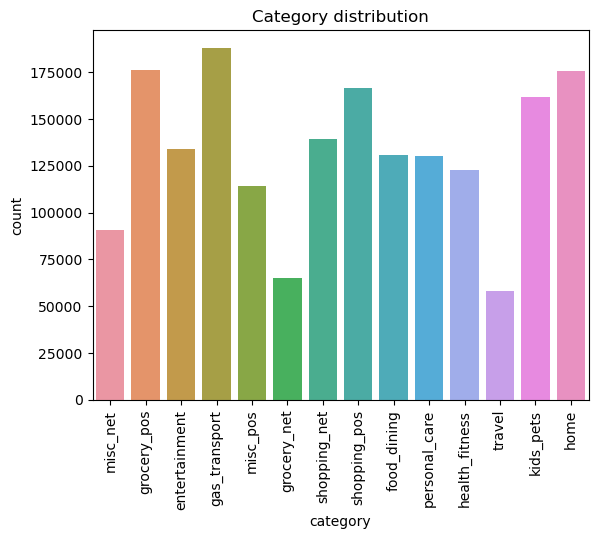

In [23]:
sns.countplot(x='category', data=fraud_data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

### b. Histogram for amount

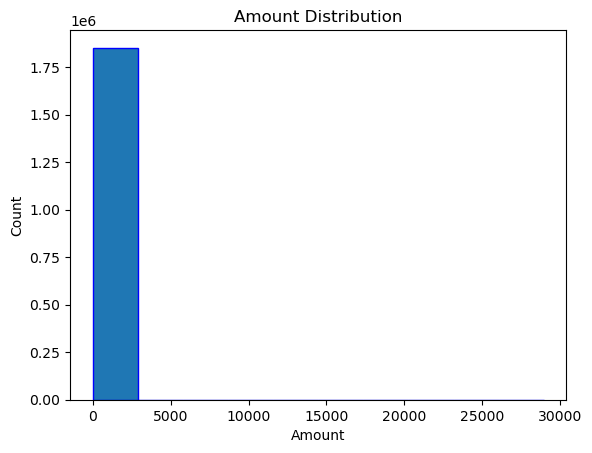

In [24]:
plt.hist(fraud_data['amt'], edgecolor='blue')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

### c. Bar plot for gender

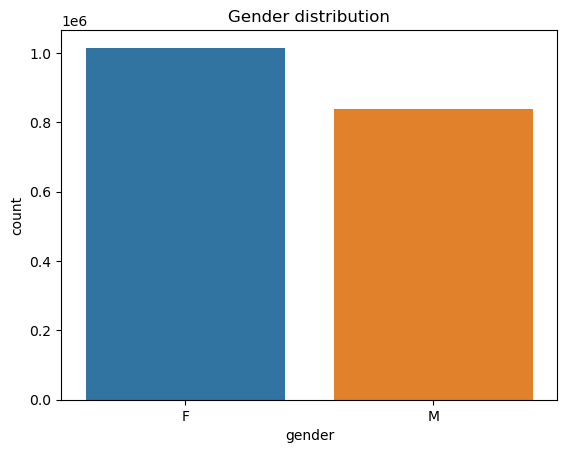

In [25]:
sns.countplot(x='gender', data=fraud_data)
plt.title('Gender distribution')
plt.show()

### d. Bar plot for state

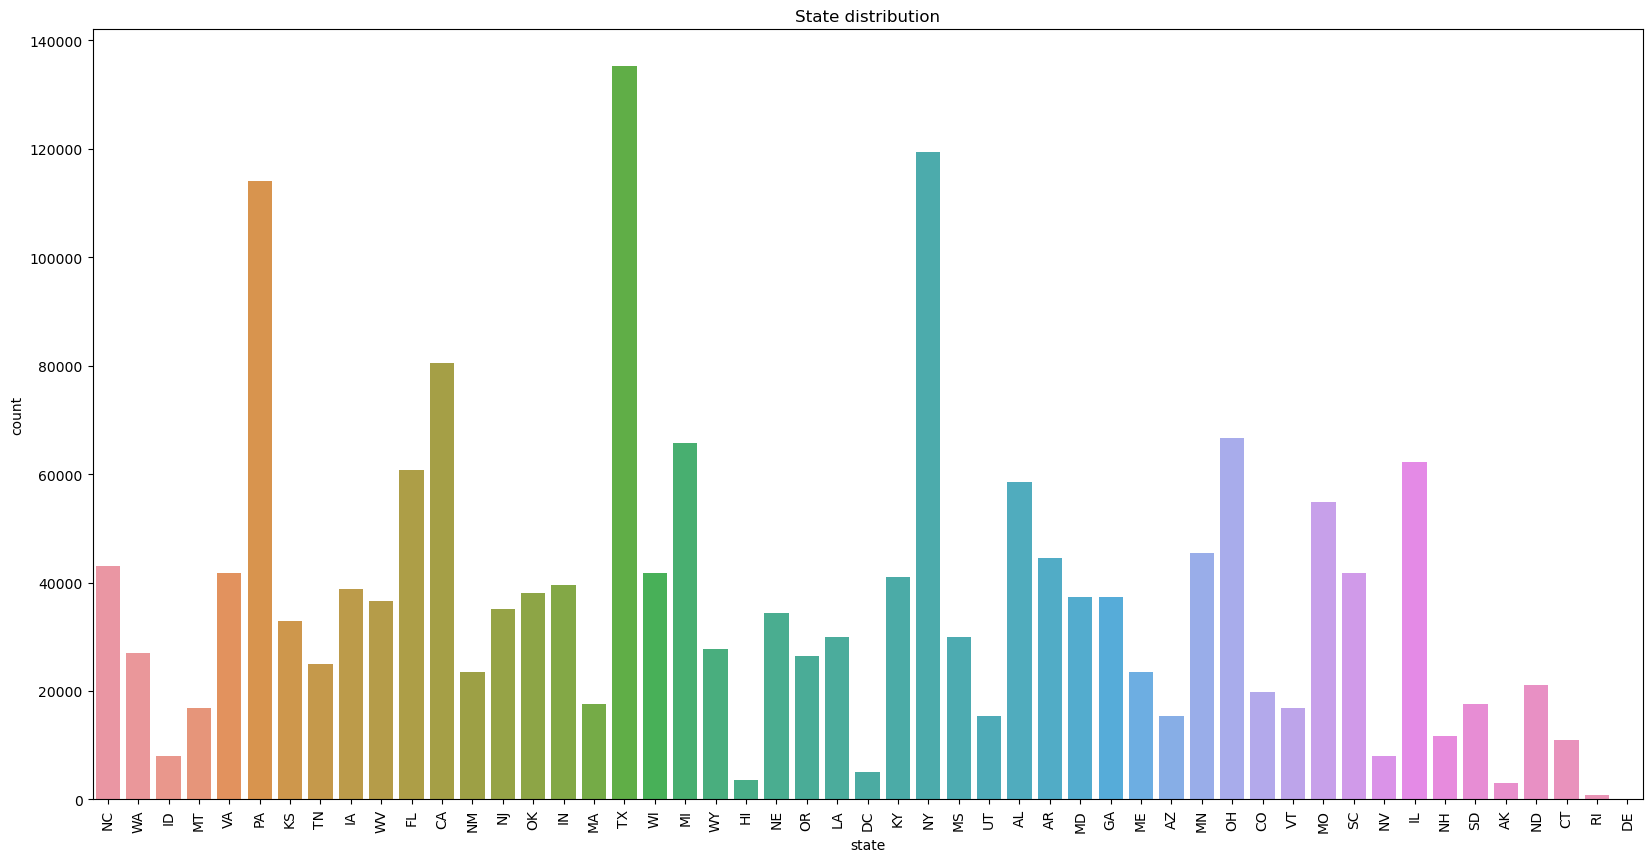

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=fraud_data)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

### Histogram for age

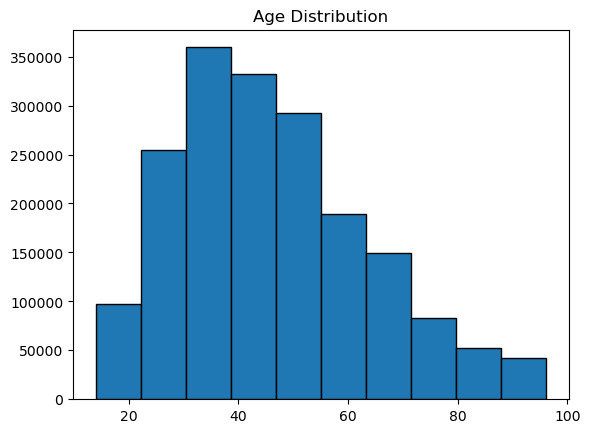

In [27]:
plt.hist(fraud_data['age_years'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

### e. Bar plot for is_fraud

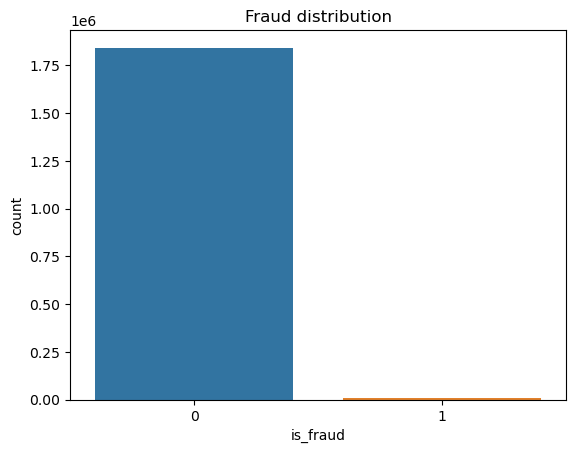

In [28]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud distribution')
plt.show()

In [29]:
fraud_data.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

## D) Bivariate Analysis

### a. Boxplot Amount vs Fraud Classification

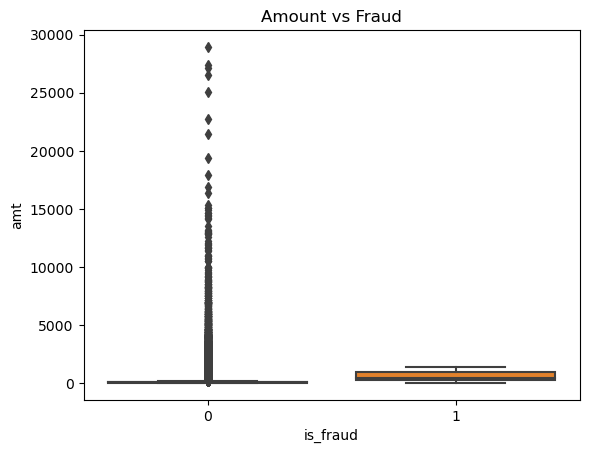

In [30]:
sns.boxplot(x='is_fraud', y='amt', data=fraud_data)
plt.title("Amount vs Fraud")
plt.show()

### b. Count plot for gender vs fraud

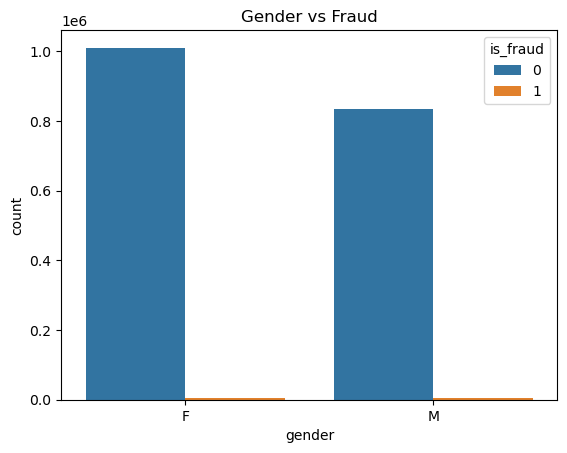

In [31]:
sns.countplot(x='gender', hue='is_fraud', data=fraud_data)
plt.title("Gender vs Fraud")
plt.show()

### c. Count plot for category

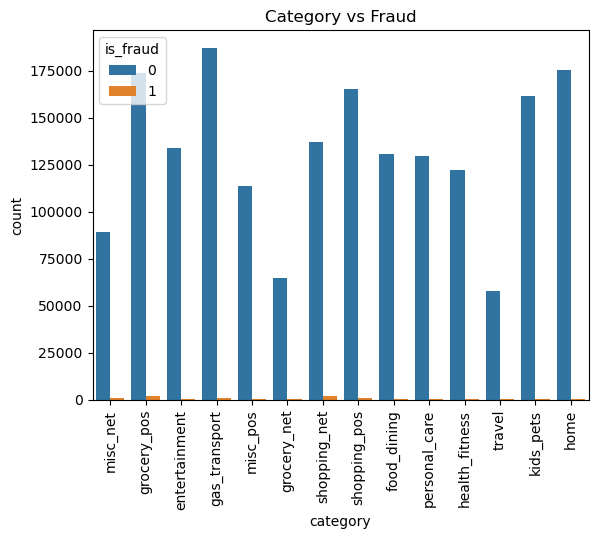

In [32]:
sns.countplot(x='category', hue='is_fraud', data=fraud_data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

### d. State vs Fraud 

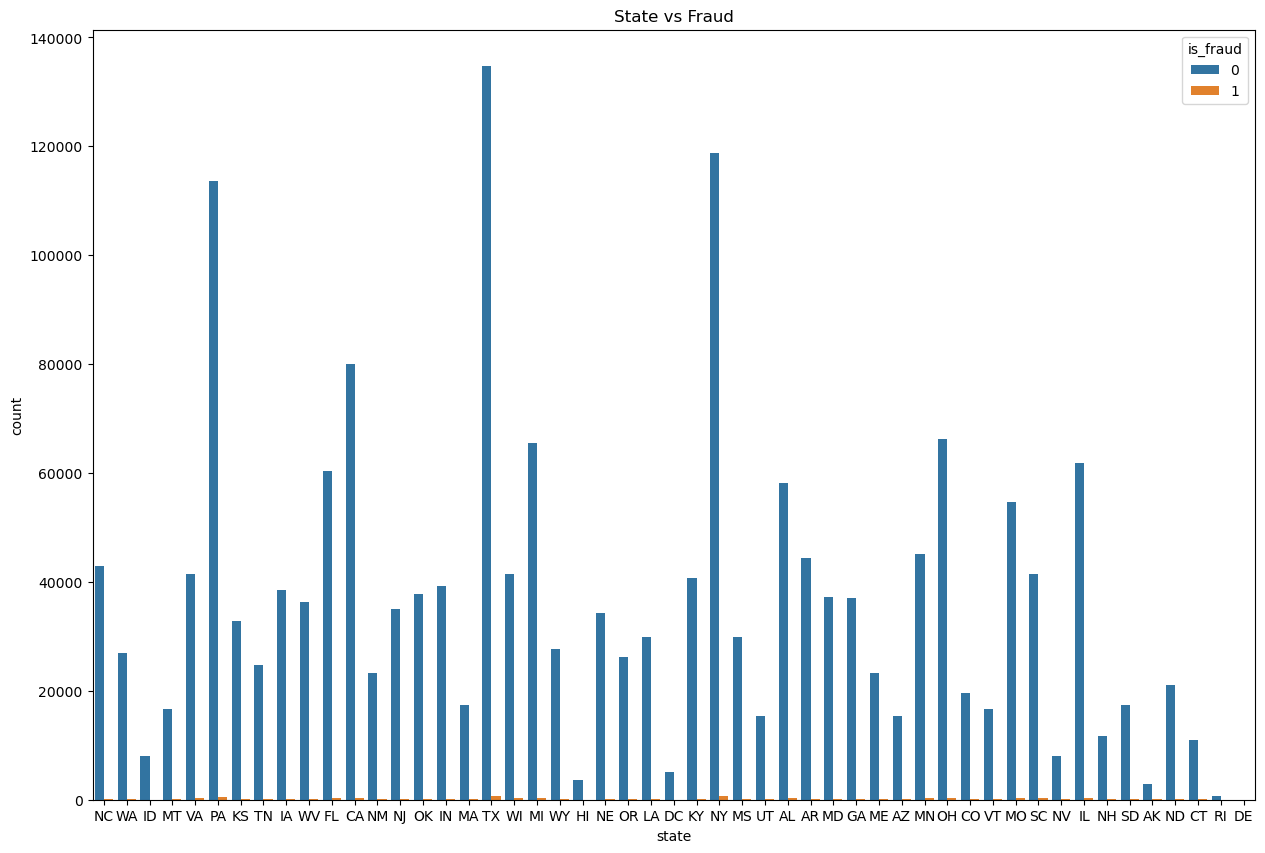

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='state', hue='is_fraud', data=fraud_data)
plt.title("State vs Fraud")
plt.show()

### e. Boxplot Age vs Fraud

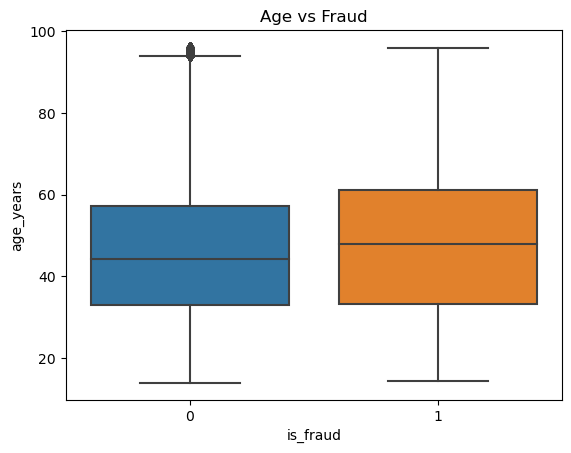

In [34]:
sns.boxplot(y='age_years', x='is_fraud', data=fraud_data)
plt.title('Age vs Fraud')
plt.show()

## E) Multivariate Analysis

### a. Violinplot of Amount against fraud classfication split by gender

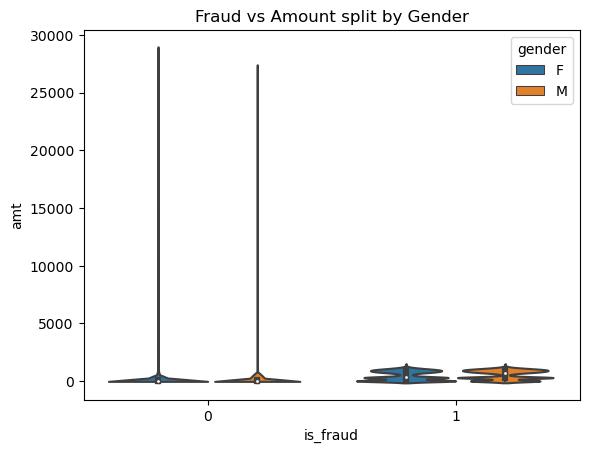

In [35]:
sns.violinplot(x='is_fraud', y='amt', hue='gender', data=fraud_data)
plt.title('Fraud vs Amount split by Gender')
plt.show()

### b. Violin plot of Age against fraud classification split by gender

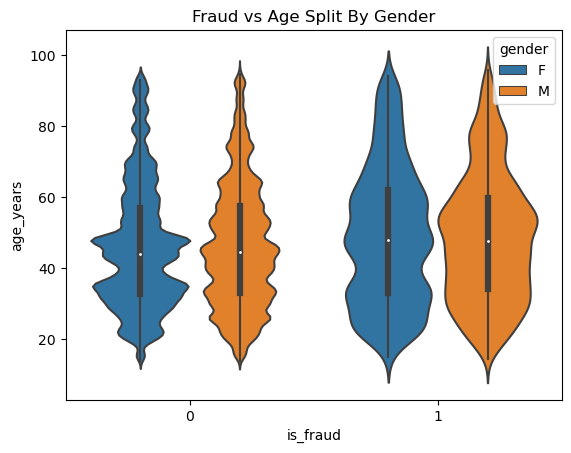

In [36]:
sns.violinplot(x='is_fraud', y='age_years', hue='gender', data=fraud_data)
plt.title('Fraud vs Age Split By Gender')
plt.show()

### c. Scatterplot Age vs Amounts vs Fraud

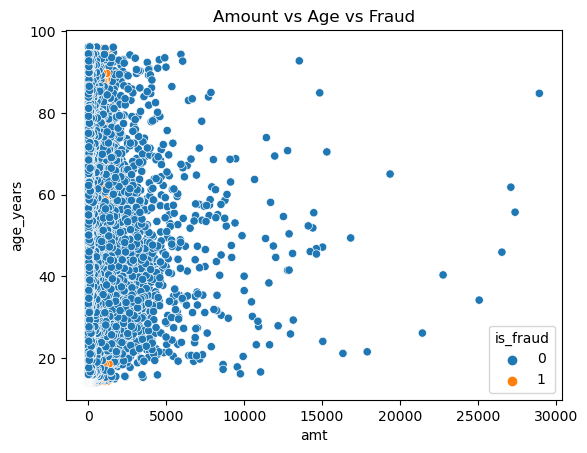

In [37]:
sns.scatterplot(data=fraud_data, x='amt', y='age_years', hue='is_fraud')
plt.title('Amount vs Age vs Fraud')
plt.show()

## F) Correlation

<Axes: >

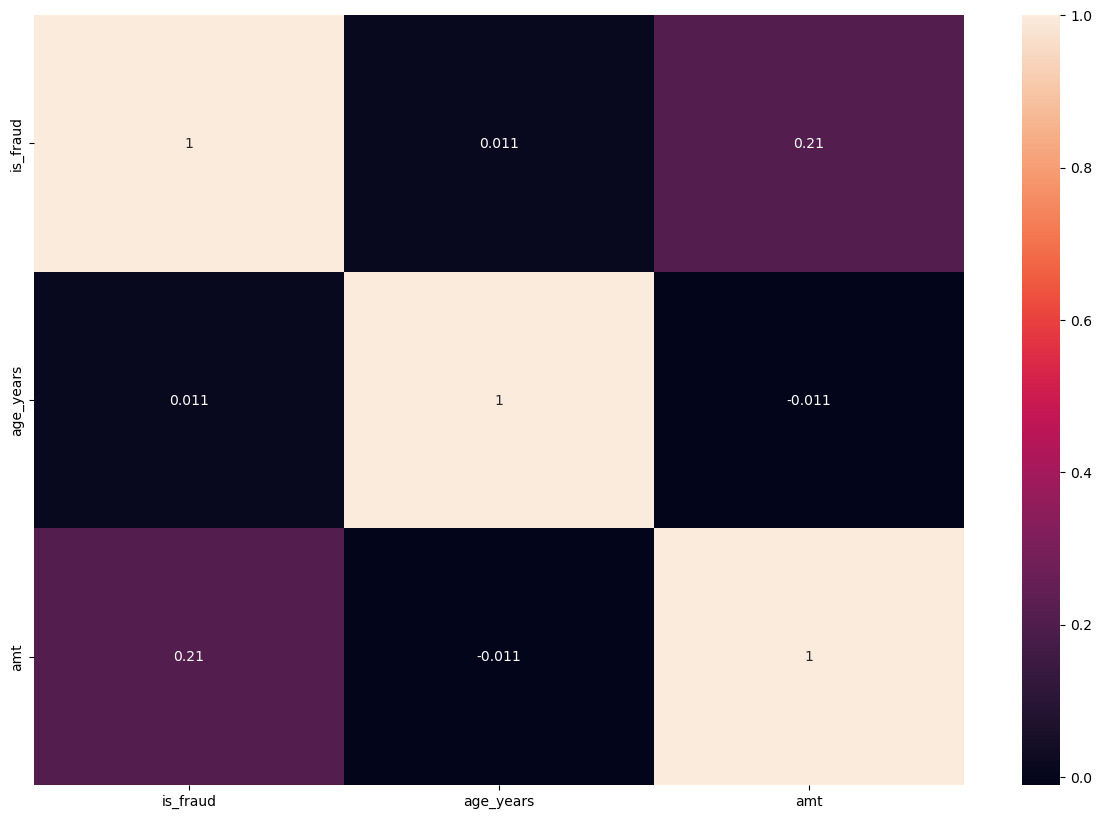

In [38]:
correlation_matrix = fraud_data[['is_fraud', 'age_years', 'amt']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True)

## G) Graph Analysis

In [49]:
import networkx as nx

In [50]:
default_edge_color = '#808080'  # A shade of gray
default_node_color = '#6A5ACD'  # Slate blue
enhanced_node_color = '#FFA07A'  # Light salmon
enhanced_edge_color = '#800000'  # Maroon

In [70]:
df = pd.concat([fraud_train[fraud_train["is_fraud"]==0].sample(frac=0.20, random_state=42), fraud_train[fraud_train["is_fraud"] == 1]])
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
811778,2019-12-07 10:55:06,676173792455,"fraud_Zieme, Bode and Dooley",gas_transport,86.19,Brittany,Cox,F,07177 William Dale Apt. 547,Santa Monica,CA,90403,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,f32d1f4b2a918f4c2f6acdc83033ee35,1354877706,33.287851,-118.740970,0
1101718,2020-04-03 13:10:06,30518206766474,fraud_Lind-Buckridge,entertainment,85.81,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,f5dad8e2d7c39d81502d846a20286659,1364994606,36.539950,-89.857416,0
800013,2019-12-04 07:07:04,4658490815480264,fraud_Hackett-Lueilwitz,grocery_pos,99.30,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,1d023bc78ab93ab65a35bbb53bcc67bd,1354604824,39.582872,-78.838550,0
398945,2019-06-30 18:43:08,4716561796955522,fraud_Lynch-Wisozk,home,42.09,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,dbf6c06d3277438afdf7af883fb4285f,1341081788,48.310513,-112.837535,0
207455,2019-04-15 19:57:49,3528407217576457,fraud_Fisher-Schowalter,shopping_net,4.24,Patricia,Leach,F,71309 Martinez Stravenue,Kingsport,TN,37663,36.4715,-82.4834,87124,Warden/ranger,1987-02-14,88814660aba0101b174e1e8137f4a7af,1334519869,37.329094,-82.070746,0


In [51]:
def build_graph_bipartite(df_input, graph_type=nx.Graph()):
    df = df_input.copy()
    
    # Create a node graph by matching unique credit card numbers to merchant IDs
    mapping = {x:node_id for node_id,x in enumerate(set(df["cc_num"].values.tolist() + df["merchant"].values.tolist()))}
    df["from"] = df["cc_num"].apply(lambda x: mapping[x])
    df["to"] = df["merchant"].apply(lambda x: mapping[x])
    
    # 'from', 'to', 'amt', 'is_fraud'
    df = df[['from', 'to', "amt", "is_fraud"]].groupby(['from', 'to']).agg({"is_fraud": "sum", "amt": "sum"}).reset_index()
    
    # 'is_fraud' Convert the string to 0 and 1
    df["is_fraud"] = df["is_fraud"].apply(lambda x: 1 if x>0 else 0)
    
    # Create a graph
    G = nx.from_edgelist(df[["from", "to"]].values, create_using=graph_type)
    
    # The configuration property node
    nx.set_node_attributes(G,{x:1 for x in df["from"].unique()}, "bipartite")
    nx.set_node_attributes(G,{x:2 for x in df["to"].unique()}, "bipartite")
    
    # Set edge label
    nx.set_edge_attributes(G, 
                       {(int(x["from"]), int(x["to"])):x["is_fraud"] for idx, x in df[["from","to","is_fraud"]].iterrows()}, 
                       "label")

    # Set edge weight
    nx.set_edge_attributes(G, 
                       {(int(x["from"]), int(x["to"])):x["amt"] for idx, x in df[["from","to","amt"]].iterrows()}, 
                       "weight")
    return G

# triple classification graph creation function
def build_graph_tripartite(df_input, graph_type=nx.Graph()):
    df = df_input.copy()
    
    # Create graph nodes by mapping unique indices, credit card numbers, and merchant IDs
    mapping = {x:node_id for node_id,x in enumerate(set(df.index.values.tolist() + 
                                                        df["cc_num"].values.tolist() + 
                                                        df["merchant"].values.tolist()))}
    df["in_node"] = df["cc_num"].apply(lambda x: mapping[x])
    df["out_node"] = df["merchant"].apply(lambda x: mapping[x])

    # create graph
    G = nx.from_edgelist([(x["in_node"], mapping[idx]) for idx, x in df.iterrows()] +
                         [(x["out_node"], mapping[idx]) for idx, x in df.iterrows()], 
                         create_using=graph_type)

    # Set node properties
    nx.set_node_attributes(G,{x["in_node"]:1 for idx,x in df.iterrows()}, "bipartite")
    nx.set_node_attributes(G,{x["out_node"]:2 for idx,x in df.iterrows()}, "bipartite")
    nx.set_node_attributes(G,{mapping[idx]:3 for idx, x in df.iterrows()}, "bipartite")

    # Edge label settings
    nx.set_edge_attributes(G,{(x["in_node"], mapping[idx]):x["is_fraud"] for idx, x in df.iterrows()}, "label")
    nx.set_edge_attributes(G,{(x["out_node"], mapping[idx]):x["is_fraud"] for idx, x in df.iterrows()}, "label")

    # Edge weight settings
    nx.set_edge_attributes(G,{(x["in_node"], mapping[idx]):x["amt"] for idx, x in df.iterrows()}, "weight")
    nx.set_edge_attributes(G,{(x["out_node"], mapping[idx]):x["amt"] for idx, x in df.iterrows()}, "weight")
    return G

In [71]:
# Create dual classification graph
G = build_graph_bipartite(df, nx.Graph())

# Check if the generated graph is a dual classification graph
from networkx.algorithms import bipartite
bipartite.is_bipartite(G)

True

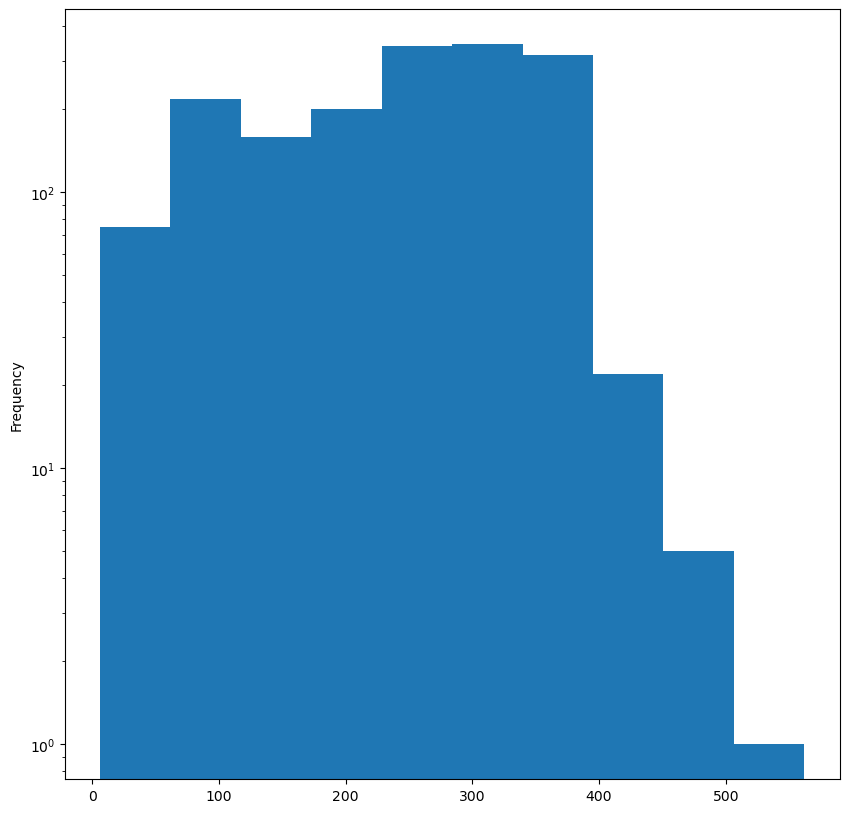

In [72]:
# Set the picture size.
plt.figure(figsize=(10,10))

# Calculate the degree (number of connected edges) of each node and save it as a series.
degrees = pd.Series({k: v for k, v in nx.degree(G)})

# Draw a histogram of degrees.
degrees.plot.hist()

# Set the scale of the y-axis to logarithmic, so that the distribution can be clearly seen even though there are not many nodes with high degree values.
plt.yscale("log")


In [73]:
# Get the weight for each edge of the graph as a series.
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in G.edges(data=True)})

# Calculates the 10%, 50%, 70%, 90%, and 100% quantiles of weight values.
np.quantile(allEdgesWeights.values,[0.10,0.50,0.70,0.9,1.0])

array([5.030000e+00, 5.825000e+01, 9.844000e+01, 2.156560e+02,
       1.530595e+04])

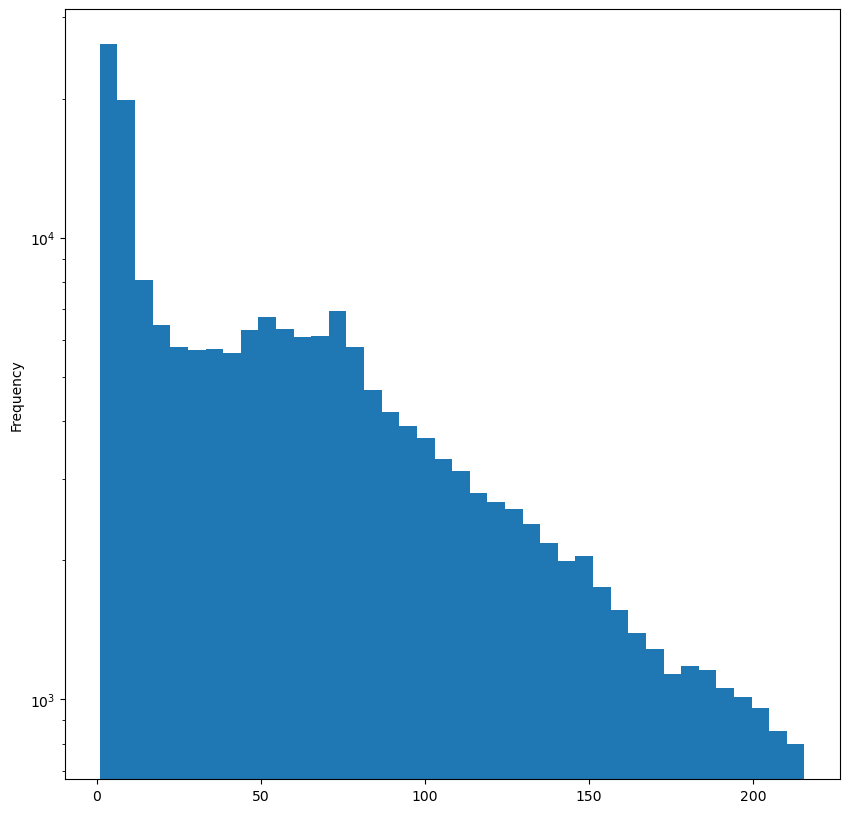

In [74]:
# Compute the distribution of edge weights.
quant_dist = np.quantile(allEdgesWeights.values,[0.10,0.50,0.70,0.9])

# Select only edges with weights less than the 90% quantile.
allEdgesWeightsFiltered = pd.Series({(d[0], d[1]): d[2]["weight"] for d in G.edges(data=True) 
                                     if d[2]["weight"] < quant_dist[-1]})

plt.figure(figsize=(10,10))

# Display the filtered edge weights as a histogram.
allEdgesWeightsFiltered.plot.hist(bins=40)

# Set the y-axis to logarithmic scale.
plt.yscale("log")

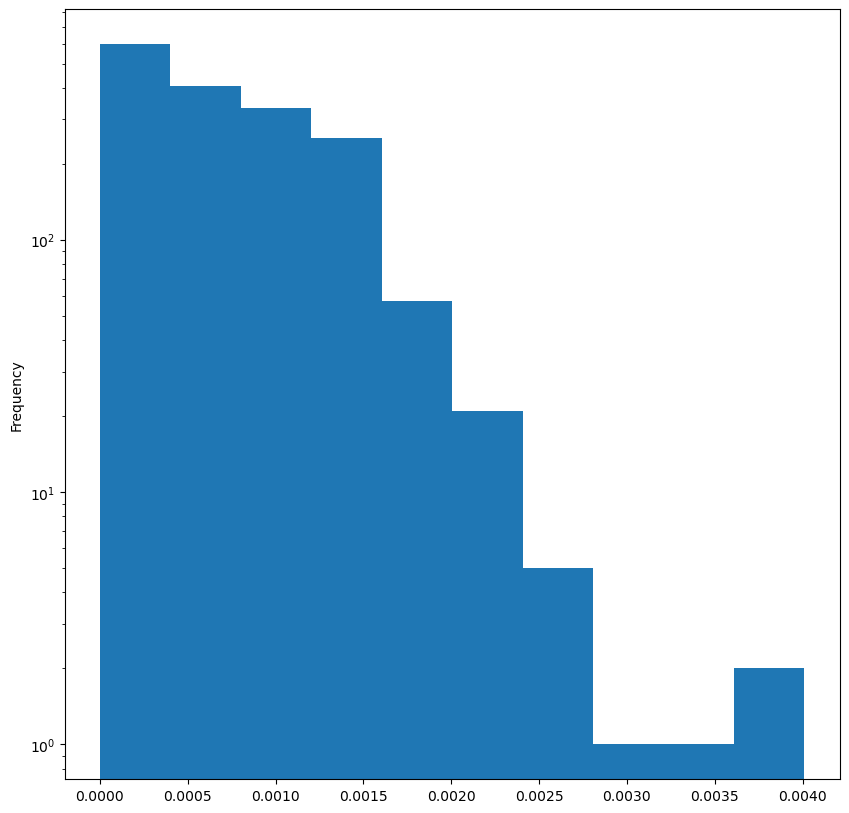

In [75]:
plt.figure(figsize=(10,10))

# Compute the betweenness centrality for each node in the graph.
bC = nx.betweenness_centrality(G)

# Display the betweenness centrality distribution as a histogram.
bc_distr = pd.Series(bC)
bc_distr.plot.hist()

# Set the y-axis to logarithmic scale.
plt.yscale("log")

In [76]:
# Calculate the average betweenness centrality.
np.mean(list(bC.values()))

0.000720547185799644

<Axes: ylabel='Frequency'>

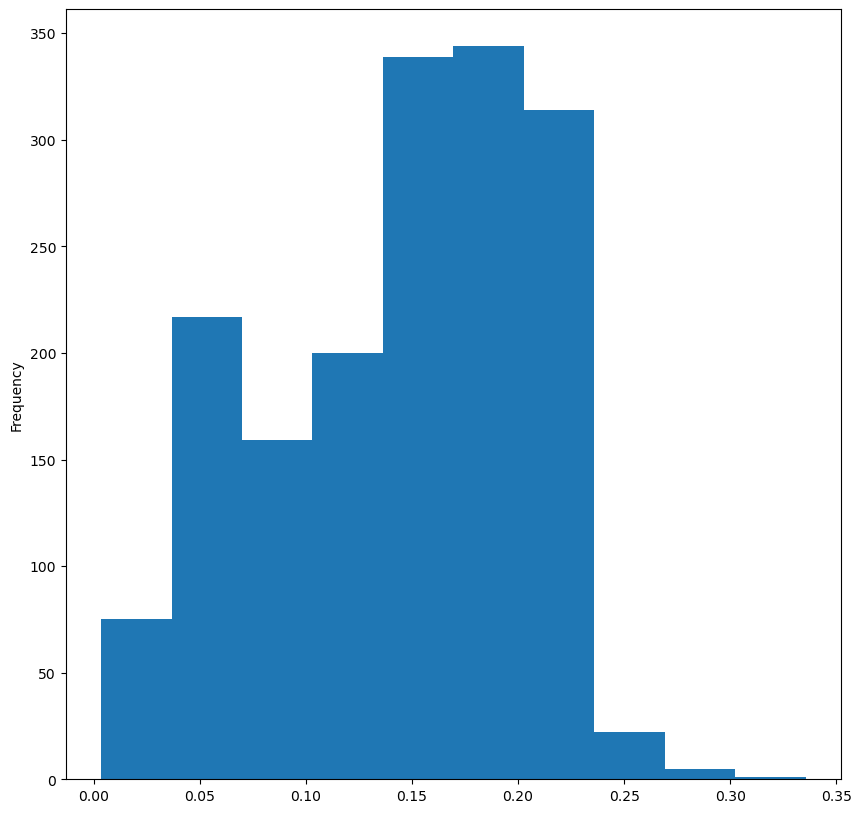

In [77]:
plt.figure(figsize=(10,10))

# Calculate the degree centrality for each node in the graph.
deg_C = nx.degree_centrality(G)

# Display the degree centrality distribution as a histogram.
degc_distr = pd.Series(deg_C)
degc_distr.plot.hist()

<Axes: ylabel='Frequency'>

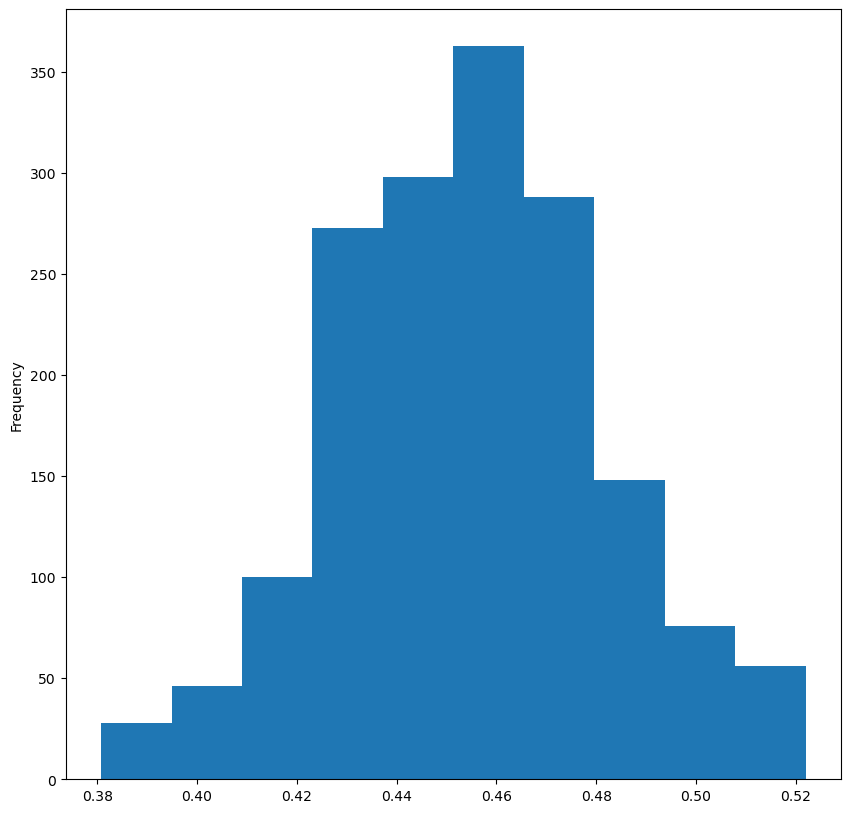

In [78]:
plt.figure(figsize=(10,10))

# Calculate the closeness centrality for each node in the graph.
clos_C = nx.closeness_centrality(G)

# Display the closeness centrality distribution as a histogram.
closc_distr = pd.Series(clos_C)
closc_distr.plot.hist()

In [79]:
# Calculate the average of the closeness centralities.
np.mean(list(clos_C.values()))

0.45484068767616925

In [80]:
# Calculates the degree assortativity of a graph.
nx.degree_pearson_correlation_coefficient(G)

-0.1377432041049188

### 📊 Community Detection

!pip install python-louvain

In [81]:
import community

# Find communities in graph G using the Louvain algorithm.
# Use the 'weight' property as the weight, and set the random_state to ensure reproducibility of the results.
parts = community.best_partition(G, random_state=42, weight='weight')

# parts is a dictionary with node id as key and community id as value.
# Convert this to a pandas Series to count the number of nodes belonging to each community.
communities = pd.Series(parts)
communities.value_counts().sort_values(ascending=False)

1     551
0     327
2     198
4     139
8     117
6      97
5      70
9      62
10     56
3      34
7      25
dtype: int64

In [82]:
# Extract each community into subgraphs, and compute the percentage of fraudulent incidents in each subgraph.
graphs = []
d = {}
for x in communities.unique():
    tmp = nx.subgraph(G, communities[communities==x].index)
    fraud_edges = sum(nx.get_edge_attributes(tmp, "label").values())
    ratio = 0 if fraud_edges == 0 else (fraud_edges/tmp.number_of_edges())*100
    d[x] = ratio
    graphs += [tmp]

# Create a pandas Series of fraudulent incident rates for each community, sorted in descending order.
pd.Series(d).sort_values(ascending=False)


3     33.333333
4     23.487179
7     20.689655
5     19.382022
9     18.819188
6     17.684887
8     16.749380
10    15.413534
2      7.020946
0      4.607509
1      1.392421
dtype: float64

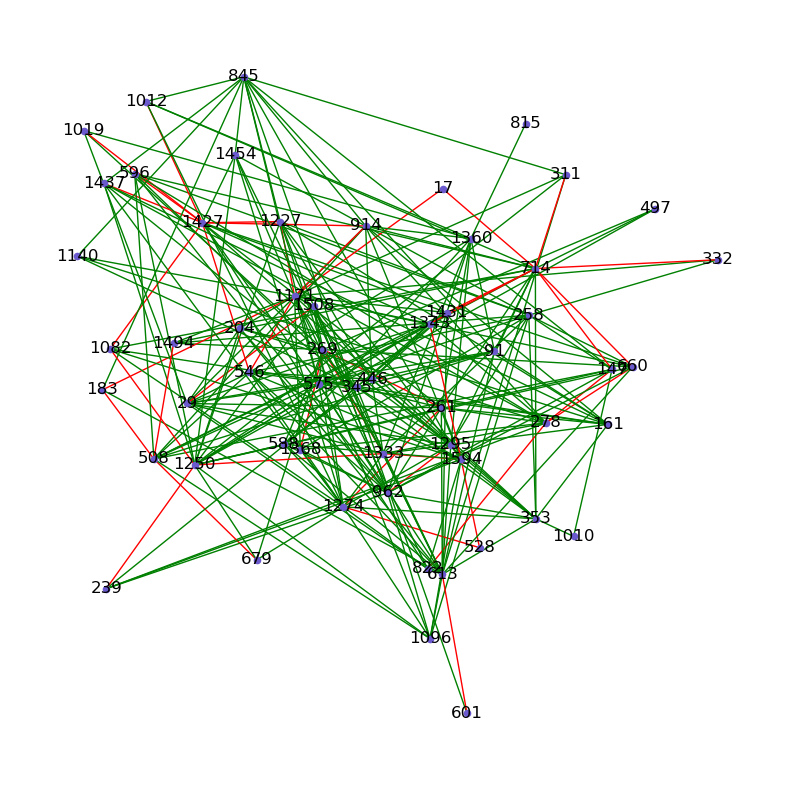

In [86]:
# Visualize the graph for a specific community (here, the community with ID 9).
gId = 9
plt.figure(figsize=(10,10))
spring_pos = nx.spring_layout(graphs[gId])
plt.axis("off")
edge_colors = ["r" if x == 1 else "g" for x in nx.get_edge_attributes(graphs[gId], 'label').values()]
nx.draw_networkx(graphs[gId], pos=spring_pos, node_color=default_node_color, 
                 edge_color=edge_colors, with_labels=True, node_size=20)

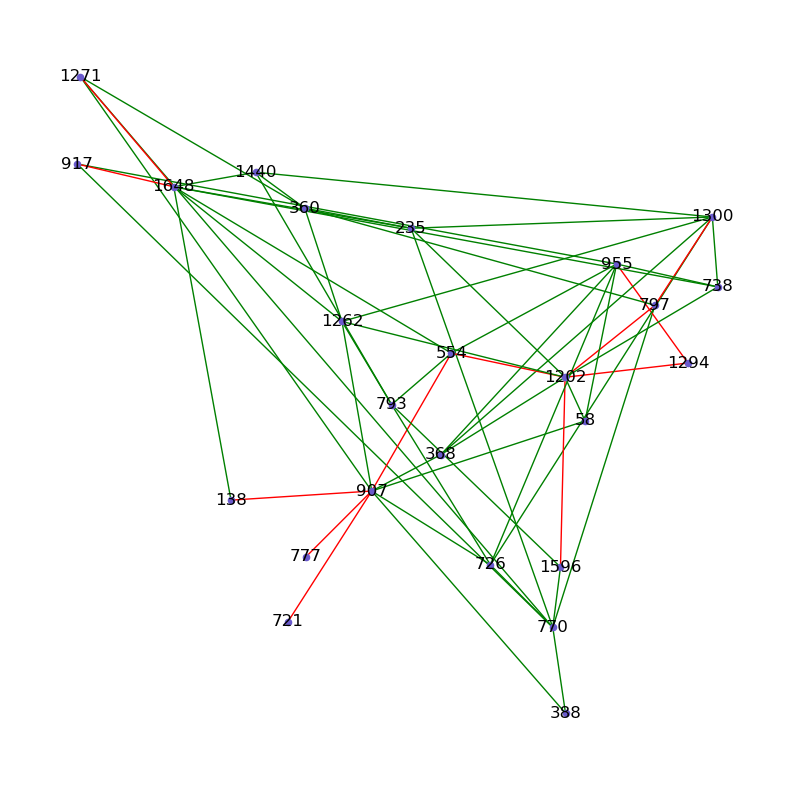

In [87]:
# Visualize the graph for a specific community (here, the community with ID 10).
gId = 10
plt.figure(figsize=(10,10))
spring_pos = nx.spring_layout(graphs[gId])
plt.axis("off")
edge_colors = ["r" if x == 1 else "g" for x in nx.get_edge_attributes(graphs[gId], 'label').values()]
nx.draw_networkx(graphs[gId], pos=spring_pos, node_color=default_node_color, 
                 edge_color=edge_colors, with_labels=True, node_size=20)

## H) Data Prepration For Modeling

### Balance Data by considering amount of is_fraud column

In [4]:
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px

In [34]:
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
df_balanced, balanced_labels = rus.fit_resample(fraud_data, fraud_data['is_fraud'])

In [6]:
fig = px.bar(df_balanced['is_fraud'].value_counts().rename_axis('Fraud').reset_index(name='count'), x="Fraud", y="count", color="count")
fig.update_layout(title_text="Fraud or not Fraud count", title_x=0.5)
fig.show()

### Train Test spliting by regrading to Stratifying

In [13]:
from sklearn.model_selection import train_test_split

In [129]:
train_data,test_data =train_test_split(df_balanced,shuffle=True,test_size=0.2,stratify=df_balanced['is_fraud'])

In [46]:
fig = px.bar(train_data['is_fraud'].value_counts().rename_axis('Fraud').reset_index(name='count'), x="Fraud", y="count", color="count")
fig.update_layout(title_text="Fraud or not Fraud count in train data", title_x=0.5)
fig.show()

In [48]:
fig = px.bar(test_data['is_fraud'].value_counts().rename_axis('Fraud').reset_index(name='count'), x="Fraud", y="count", color="count")
fig.update_layout(title_text="Fraud or not Fraud count in test data", title_x=0.5)
fig.show()

## I) Model Development

### a. Machine learning

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pathlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [30]:
def plot_classification_report(y_test, y_pred, title='Classification Report', figsize=(8, 6), dpi=70, save_fig_path=None, **kwargs):
    """
    Plot the classification report of sklearn
    
    Parameters
    ----------
    y_test : pandas.Series of shape (n_samples,)
        Targets.
    y_pred : pandas.Series of shape (n_samples,)
        Predictions.
    title : str, default = 'Classification Report'
        Plot title.
    fig_size : tuple, default = (8, 6)
        Size (inches) of the plot.
    dpi : int, default = 70
        Image DPI.
    save_fig_path : str, defaut=None
        Full path where to save the plot. Will generate the folders if they don't exist already.
    **kwargs : attributes of classification_report class of sklearn
    
    Returns
    -------
        fig : Matplotlib.pyplot.Figure
            Figure from matplotlib
        ax : Matplotlib.pyplot.Axe
            Axe object from matplotlib
    """    
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        
    clf_report = classification_report(y_test, y_pred, output_dict=True, **kwargs)
    keys_to_plot = [key for key in clf_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]
    df = pd.DataFrame(clf_report, columns=keys_to_plot).T
    #the following line ensures that dataframe are sorted from the majority classes to the minority classes
    df.sort_values(by=['support'], inplace=True) 
    
    #first, let's plot the heatmap by masking the 'support' column
    rows, cols = df.shape
    mask = np.zeros(df.shape)
    mask[:,cols-1] = True
 
    ax = sns.heatmap(df, mask=mask, annot=True, cmap="YlGn", fmt='.3g',
            vmin=0.0,
            vmax=1.0,
            linewidths=2, linecolor='white'
                    )
    
    #then, let's add the support column by normalizing the colors in this column
    mask = np.zeros(df.shape)
    mask[:,:cols-1] = True    
    
    ax = sns.heatmap(df, mask=mask, annot=True, cmap="YlGn", cbar=False,
            linewidths=2, linecolor='white', fmt='.0f',
            vmin=df['support'].min(),
            vmax=df['support'].sum(),         
            norm=mpl.colors.Normalize(vmin=df['support'].min(),
                                      vmax=df['support'].sum())
                    ) 
            
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 360)
         
    if (save_fig_path != None):
        path = pathlib.Path(save_fig_path)
        path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_fig_path)
    
    return fig, ax

#### Logestic Regresion

In [38]:
df_balanced = df_balanced.drop('trans_date_trans_time', axis=1)
df_balanced = df_balanced.drop('state', axis=1)
df_balanced = df_balanced.drop('merchant', axis=1)
df_balanced = df_balanced.drop('job', axis=1)
df_balanced = df_balanced.drop('dob', axis=1)
df_balanced = df_balanced.drop('category', axis=1)
df_balanced = df_balanced.drop('gender', axis=1)
df_balanced = df_balanced.drop('cc_num', axis=1)
df_balanced = df_balanced.drop('zip', axis=1)
df_balanced = df_balanced.drop('lat', axis=1)
df_balanced = df_balanced.drop('long', axis=1)
df_balanced = df_balanced.drop('unix_time', axis=1)
df_balanced = df_balanced.drop('merch_lat', axis=1)
df_balanced = df_balanced.drop('merch_long', axis=1)
df_balanced = df_balanced.drop('first', axis=1)
df_balanced = df_balanced.drop('last', axis=1)
df_balanced = df_balanced.drop('street', axis=1)
df_balanced = df_balanced.drop('city', axis=1)
df_balanced = df_balanced.drop('city_pop', axis=1)
df_balanced = df_balanced.drop('trans_num', axis=1)
df_balanced = df_balanced.drop('Unnamed: 0', axis=1)

In [23]:
df_balanced.head()

,amt,is_fraud
0,67.46,0
1,5.44,0
2,72.21,0
3,23.99,0
4,71.83,0


In [88]:
x_train, x_test, y_train, y_test = train_test_split(df_balanced, balanced_labels,shuffle=True, test_size=0.2,stratify=df_balanced['is_fraud'],random_state=1)

In [89]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9994819994819995


(<Figure size 560x420 with 2 Axes>,
 <Axes: title={'center': 'Classification Report'}>)

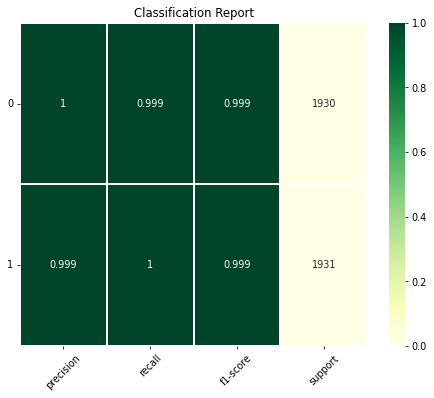

In [33]:
plot_classification_report(y_test, y_pred)

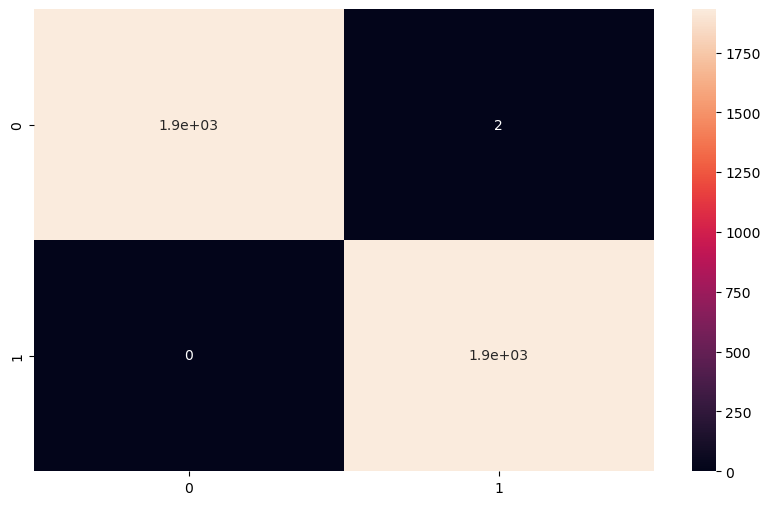

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.show()

#### Decision Tree

In [84]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
y_pred = dct.predict(x_test)

In [43]:
accuracy_score(y_test, y_pred)

1.0

(<Figure size 560x420 with 2 Axes>,
 <Axes: title={'center': 'Classification Report'}>)

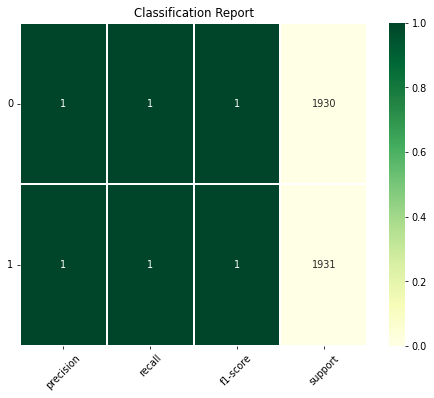

In [45]:
plot_classification_report(y_test, y_pred)

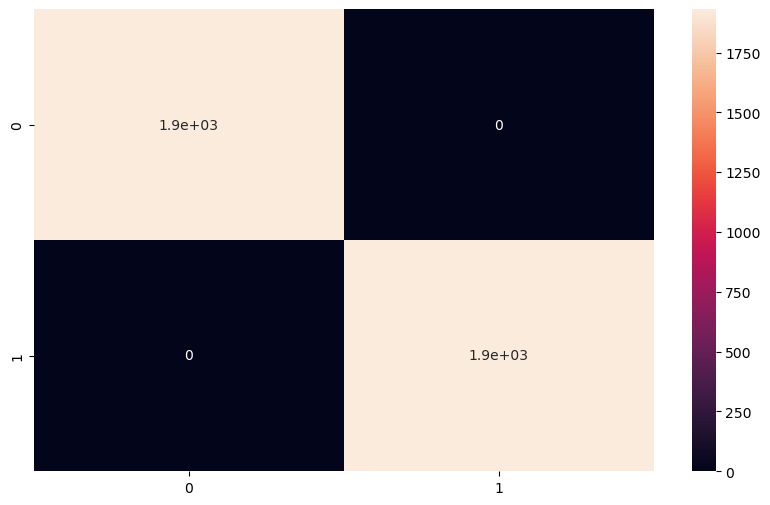

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.show()

#### XGBoost

Using an XGBoost Classifier.

In [49]:
xgbc = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = xgbc.fit(x_train, y_train)
y_pred = predictor_xgb.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

(<Figure size 560x420 with 2 Axes>,
 <Axes: title={'center': 'Classification Report'}>)

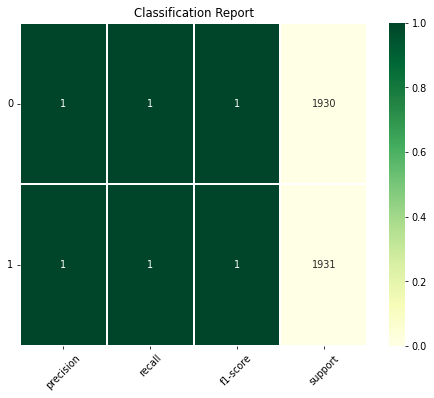

In [50]:
plot_classification_report(y_test, y_pred)

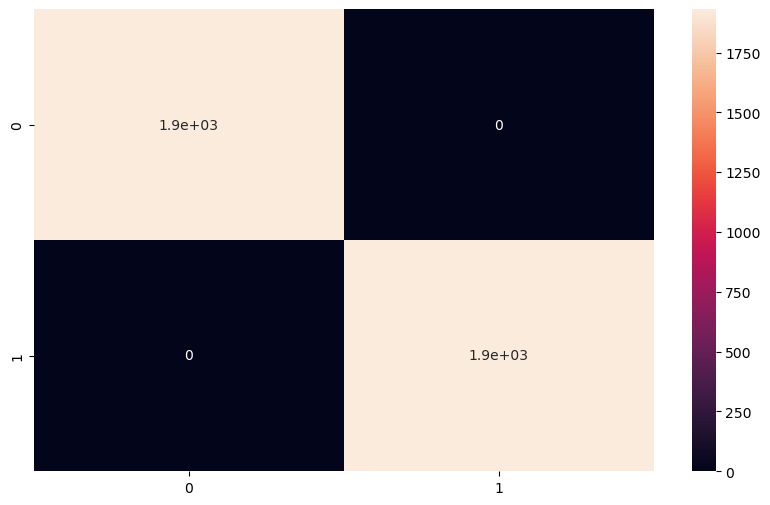

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.show()

#### SVM

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# train with grid search
svc = SVC()
parameters = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

# predict labels
y_pred = clf.predict(X_test)

# extract accuracy (r2 score)
results = roc_auc_score(y_test, y_pred)

# print score
print( 'Score is: ' + str( results ) )
print( 'Best params for the kernel SVM is: ' + str(clf.best_params_) )

Score is: 1.0
Best params for the kernel SVM is: {'C': 0.1, 'gamma': 0.1}


(<Figure size 560x420 with 2 Axes>,
 <Axes: title={'center': 'Classification Report'}>)

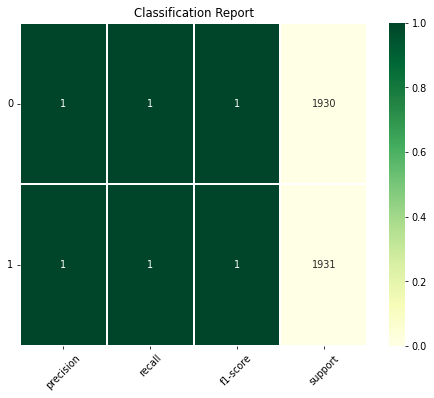

In [55]:
plot_classification_report(y_test, y_pred)

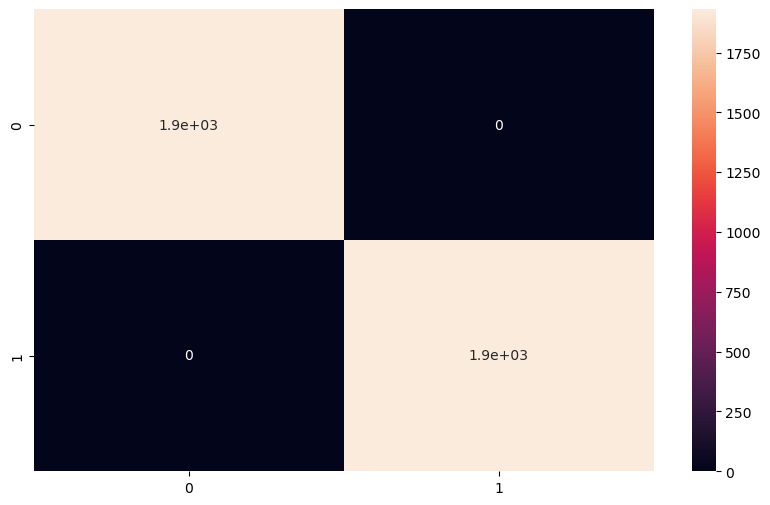

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.show()

### b. Deep learning

In [60]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, GRU,Bidirectional,BatchNormalization,PReLU,ReLU,Reshape

In [68]:
nn = Sequential(name='Simple_Neural_Network')
nn.add(Dense(100, input_shape=(2,), activation='relu'))
nn.add(Dense(50, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.summary()

Model: "Simple_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5401 (21.10 KB)
Trainable params: 5401 (21.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
EPOCHS = 5
BATCH_SIZE = 10
history = nn.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1545/1545 [==============================] - 7s 3ms/step - loss: 0.3785 - accuracy: 0.9092 - val_loss: 0.5137 - val_accuracy: 0.9736
Epoch 2/5
1545/1545 [==============================] - 4s 2ms/step - loss: 0.1788 - accuracy: 0.9797 - val_loss: 0.1064 - val_accuracy: 0.9977
Epoch 3/5
1545/1545 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9892 - val_loss: 0.0722 - val_accuracy: 0.9984
Epoch 4/5
1545/1545 [==============================] - 3s 2ms/step - loss: 0.0929 - accuracy: 0.9891 - val_loss: 0.2570 - val_accuracy: 0.9933
Epoch 5/5
1545/1545 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9904 - val_loss: 0.0984 - val_accuracy: 0.9979


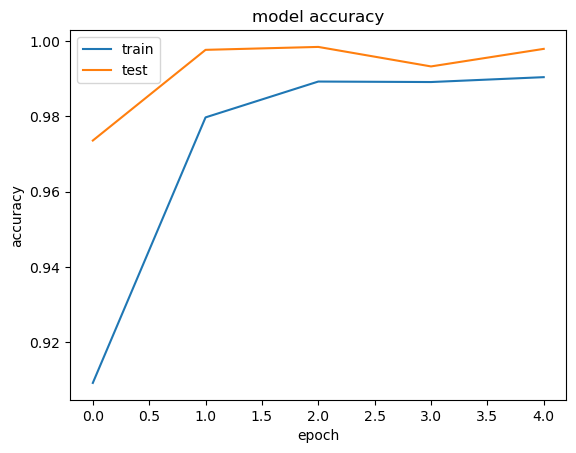

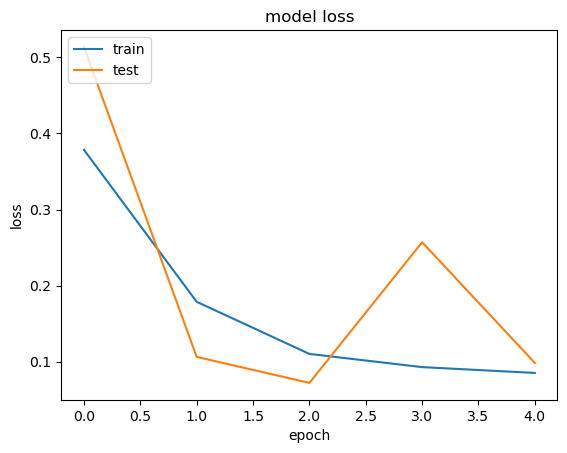

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()